In [1296]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1297]:
data_train = pd.read_csv('train.csv')
data_train.shape

(1460, 81)

In [1298]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1299]:
data_train.drop(columns=['Id'], inplace=True)

In [1300]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [1301]:
data_test = pd.read_csv('test.csv')
data_test.shape

(1459, 80)

In [1302]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Missing values

In [1303]:
pd.set_option('display.max_rows', None)
data_train.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageType         81
GarageFinish       81
GarageCond         81
GarageYrBlt        81
BsmtExposure       38
BsmtFinType2       38
BsmtQual           37
BsmtFinType1       37
BsmtCond           37
MasVnrArea          8
Electrical          1
BldgType            0
Neighborhood        0
LandSlope           0
Condition2          0
Condition1          0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSSubClass          0
MSZoning            0
LotConfig           0
Utilities           0
HouseStyle          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
BsmtFinSF1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodAdd        0
OverallQua

#### Electrical

In feauter 'Electrical' only one value is missing. Probably, there is a standart electric system, therefore, it seems reasonable to replace NA with mode.

In [1304]:
data_train['Electrical'] = data_train['Electrical'].fillna(data_train['Electrical'].mode()[0])

##### MasVnrArea and MasVnrType

- masonry veneer area in square feet and its type

These features go together. Homes in USA are typically frame houses (wooden structure). To make the house look more expensive and aesthetically pleasing, the exterior walls are covered with a this layer of stone or brick. This layer is call Masonry Veneer.

If MasVnrType is None, then MasVnr area equals to 0.



In [1305]:
data_train['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [1306]:
data_train['MasVnrType'] = data_train['MasVnrType'].fillna('None')

In [1307]:
data_train['MasVnrType'].value_counts()

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

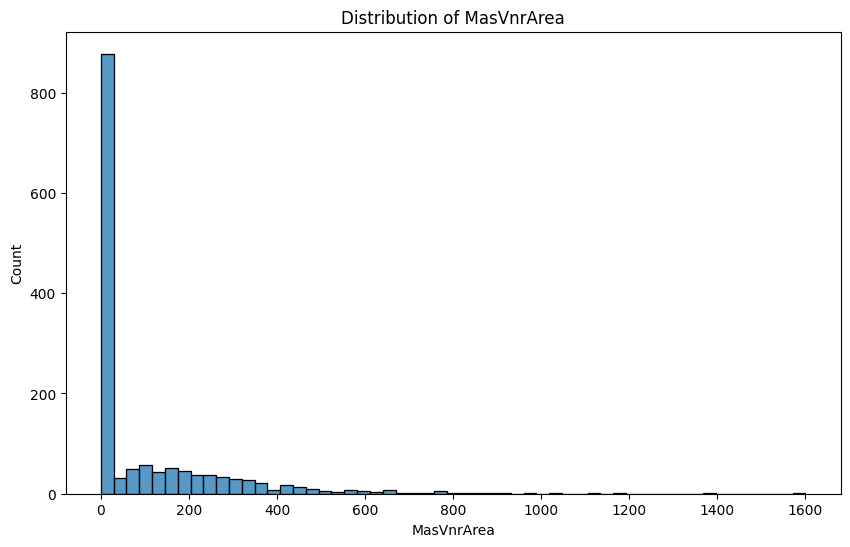

In [1308]:
plt.figure(figsize=(10,6))
sns.histplot(data_train['MasVnrArea'].dropna(), kde=False)
plt.title('Distribution of MasVnrArea')
plt.show()  

It is logical, that if the type is None, then NA in Areas values can be replaced by 0. Let's realize this.

In [1309]:
mask = (data_train['MasVnrArea'].isna()) & (data_train['MasVnrType'] == 'None')
data_train.loc[mask, 'MasVnrArea'] = 0

In [1310]:
data_train['MasVnrArea'].isna().sum()

np.int64(0)

All NA values disappeared.

##### BSMT:***

These all features refer to the characteristics of basement. In dataset there is a feature called TotalBsmtSF which reflects the total area of basement. This feature lacks of Na, so probably the presence of NA in corresponding features may be linked with no basement or with zero basement area.

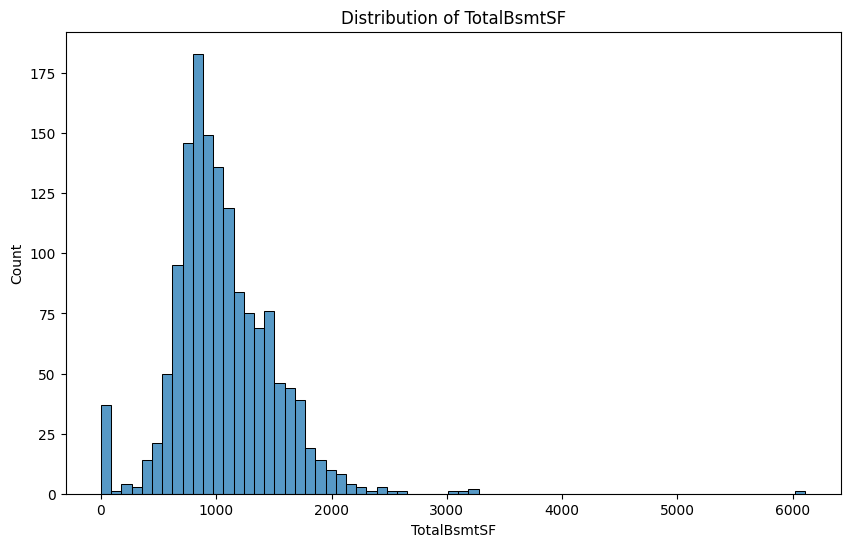

In [1311]:
plt.figure(figsize=(10,6))
sns.histplot(data_train['TotalBsmtSF'], kde=False)
plt.title('Distribution of TotalBsmtSF')
plt.show()

In [1312]:
for col in ['BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtExposure']:
    mask1 = (data_train[col].isna()) & (data_train['TotalBsmtSF'] == 0)
    data_train.loc[mask1, col] = 'No Basement'

data_train[['BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtExposure']].isna().sum()   

BsmtFinType1    0
BsmtFinType2    1
BsmtCond        0
BsmtQual        0
BsmtExposure    1
dtype: int64

In [1313]:
data_train[data_train['BsmtFinType2'].isna()].loc[:, ['BsmtQual', 'TotalBsmtSF']]

,BsmtQual,TotalBsmtSF
332,Gd,3206


In [1314]:
data_train[data_train['BsmtExposure'].isna()].loc[:, ['BsmtQual', 'TotalBsmtSF']]

,BsmtQual,TotalBsmtSF
948,Gd,936


In [1315]:
data_train['BsmtExposure'] = data_train['BsmtExposure'].fillna(data_train['BsmtExposure'].mode()[0])
data_train['BsmtFinType2'] = data_train['BsmtFinType2'].fillna(data_train['BsmtFinType2'].mode()[0])

In [1316]:
data_train[['BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtExposure']].isna().sum()   

BsmtFinType1    0
BsmtFinType2    0
BsmtCond        0
BsmtQual        0
BsmtExposure    0
dtype: int64

#### Garage:***

There are 7 features referred to a garage, in each 5 of them there are 81 NA values.

According to the dataset description, NA in Garage features means No garage. Let's replace NA in categorial features with 'No garage' and in GarageYrBlt with 0. In oder to not replace real NA values (if they exist) with 'No garage', i will base on GarageArea.

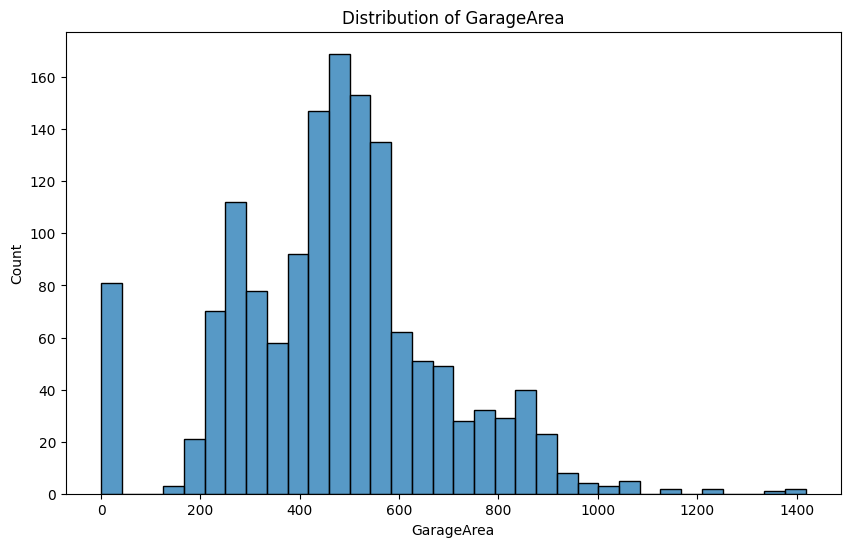

In [1317]:
plt.figure(figsize=(10,6))
sns.histplot(data_train['GarageArea'], kde=False)
plt.title('Distribution of GarageArea') 
plt.show()

In [1318]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    mask2 = (data_train[col].isna()) & (data_train['GarageArea'] == 0)
    data_train.loc[mask2, col] = 'No Garage'

data_train['GarageYrBlt'] = data_train['GarageYrBlt'].fillna(0)
data_train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt']].isna().sum() 

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
GarageYrBlt     0
dtype: int64

##### Lot frontage

Linear feet of street connected to the property. Simply put, it's the width of the lot facing the road.

259 LotFrontage values are missing.

A zero value would mean the property has no street access, which is rare case.

Reasons for NaN:

- Irregular shapes: Cul-de-sac lots (pie-shaped) or corner lots are hard to measure.

- "Flag" Lots: Lots set back from the road with a narrow driveway (panhandle).

- Data Entry Omission: Realtors might skip this field focusing on LotArea instead becaouse of it importance for taxes.

It seems that LotFrontage may vary by neighbourhood. 

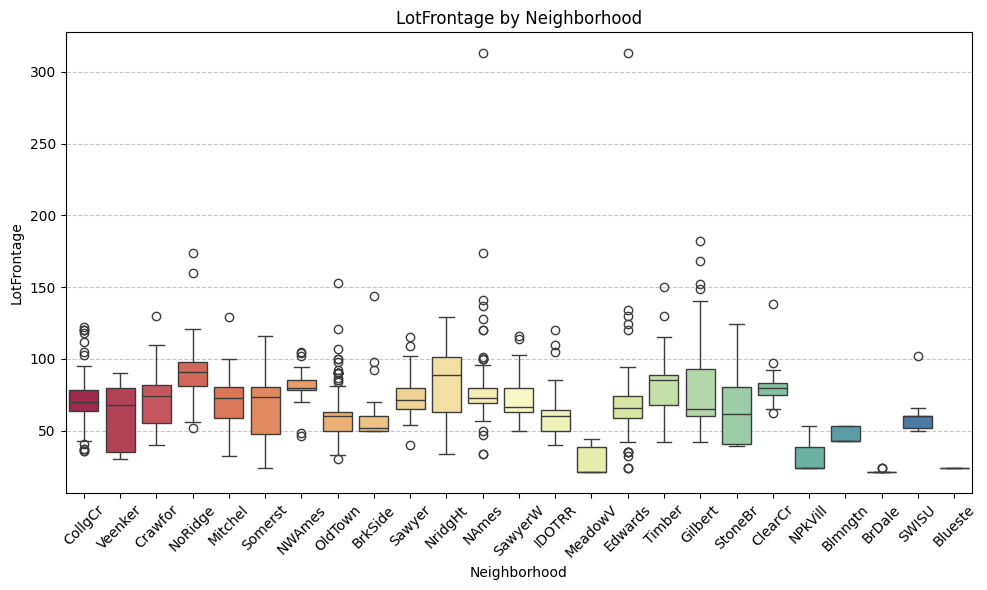

In [1319]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Neighborhood', y='LotFrontage', data=data_train, hue='Neighborhood', palette='Spectral')
plt.xticks(rotation=45)
plt.title('LotFrontage by Neighborhood')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [1320]:
data_train['LotFrontage'] = data_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#### FireplaceQu

This features is connected with FirePlace that reflects how many fireplaces are in a house. Na mean that there are no any fireplaces. 

In [1321]:
mask3 = (data_train['FireplaceQu'].isna()) & (data_train['Fireplaces'] == 0)
data_train.loc[mask3, 'FireplaceQu'] = 'No Fireplace'

data_train['FireplaceQu'].isna().sum()

np.int64(0)

##### Fence, Alley, MisFeature

According to the data description, NA in these features means lack of these features in a house. Le'ts do replacement.

In [1322]:
data_train['Fence'] = data_train['Fence'].fillna('No Fence')
data_train['Alley'] = data_train['Alley'].fillna('No Alley')
data_train['MiscFeature'] = data_train['MiscFeature'].fillna('No Feature')

##### PoolQC

This feature goes together with PoolArea. Let's replace NA in quality with 'No pool', if area is zero.

In [1323]:
mask4 = (data_train['PoolQC'].isna()) & (data_train['PoolArea'] == 0)
data_train.loc[mask4, 'PoolQC'] = 'No Pool'

data_train['PoolQC'].isna().sum()

np.int64(0)

## Data cleaning

Now, values in MSSubClass  and MoSold are treated as integers but they reflect categories (codes and months). They should be repaired.

In [1324]:
data_train['MSSubClass'] = data_train['MSSubClass'].astype(str)
data_train['MoSold'] = data_train['MoSold'].astype(str)

In [1325]:
continuous_columns = [key for key in data_train.keys() if data_train[key].dtype in ("int64", "float64")]
categorical_columns = [key for key in data_train.keys() if data_train[key].dtype == "object"]

print(f"Continuous : {len(continuous_columns)}, Categorical : {len(categorical_columns)}")

Continuous : 35, Categorical : 45


In [1326]:
columns_for_drop = []
for col in categorical_columns:
    top_value_count = data_train[col].value_counts(normalize=True).iloc[0]
    if top_value_count > 0.95:
        columns_for_drop.append(col)
        print(f"In column '{col}' {top_value_count:.2%} is only one value")

In column 'Street' 99.59% is only one value
In column 'Utilities' 99.93% is only one value
In column 'Condition2' 98.97% is only one value
In column 'RoofMatl' 98.22% is only one value
In column 'Heating' 97.81% is only one value
In column 'PoolQC' 99.52% is only one value
In column 'MiscFeature' 96.30% is only one value


Let's delete all these features as they show low variance and the presence of alternative categories is not enough to learn a model due to their small size. 

In [1327]:
data_train.drop(columns=columns_for_drop, inplace=True)

In [1328]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,No Fence,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,No Alley,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,No Fence,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,No Fence,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,No Fence,0,12,2008,WD,Normal,250000


In [1329]:
continuous_columns

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [1330]:
data_train[continuous_columns[:20]].describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438
std,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000


In [1331]:
data_train[continuous_columns[20:]].describe()

,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


--- ГРУППА 1 (Первые 20) ---


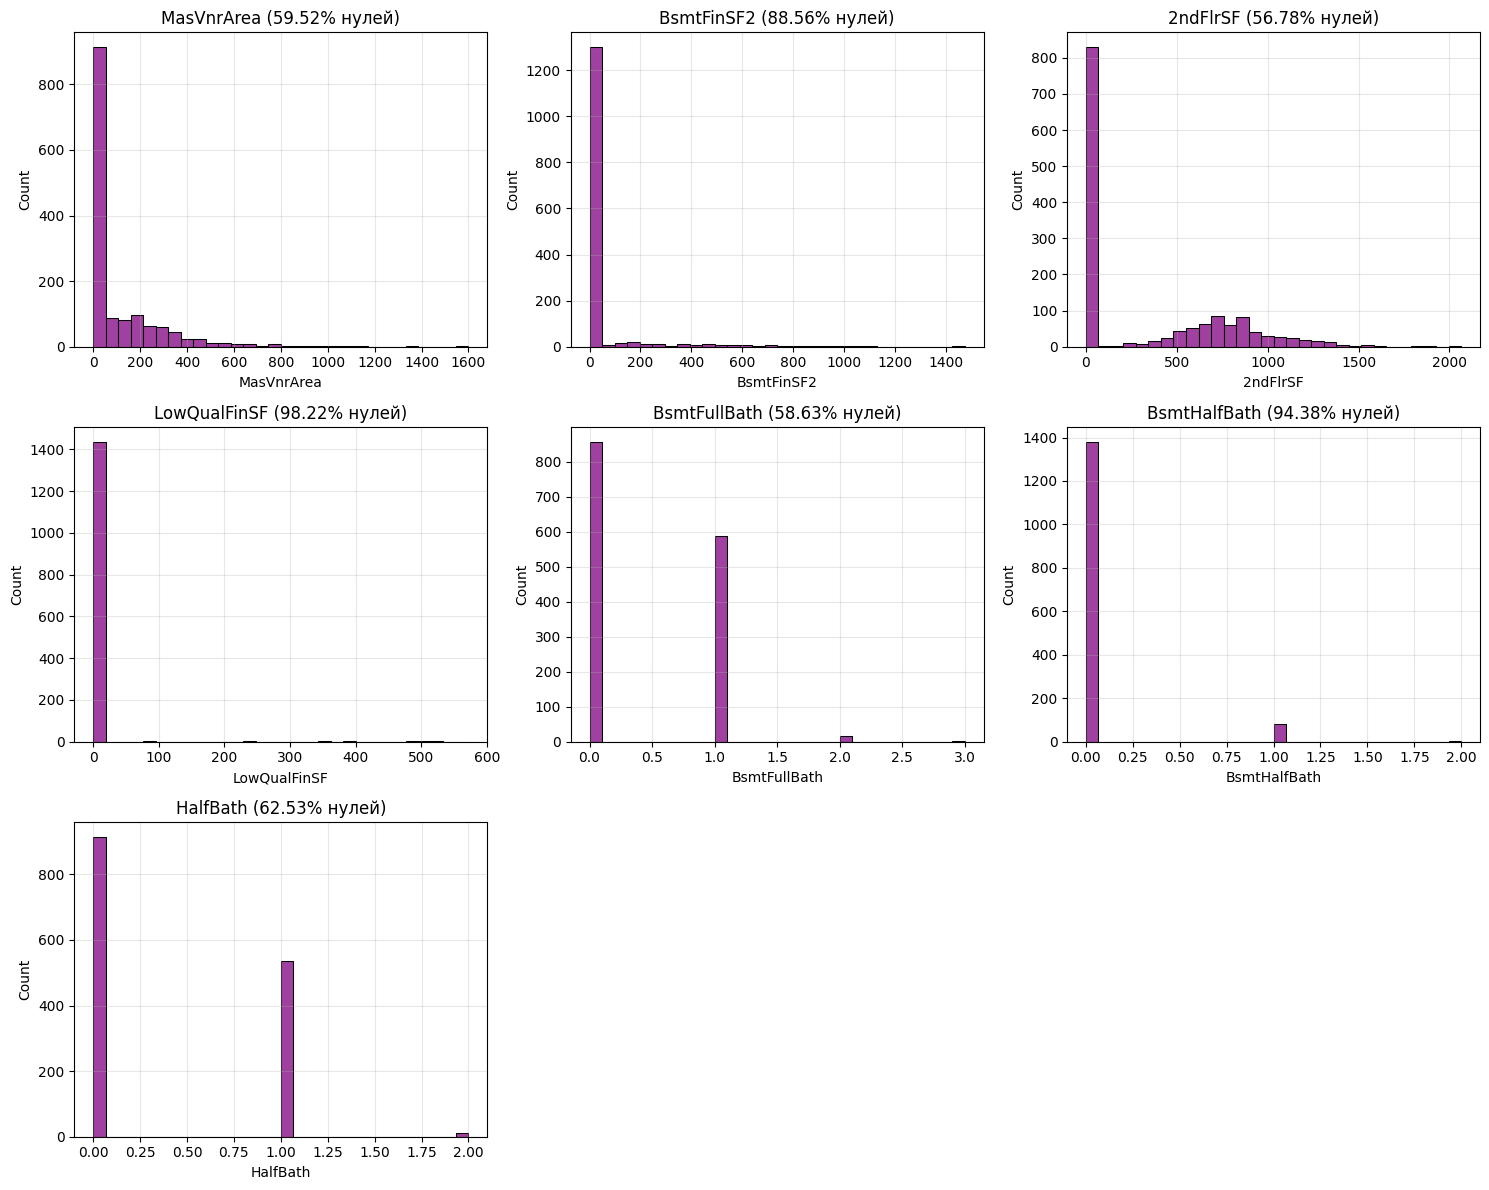


--- ГРУППА 2 (Остальные) ---


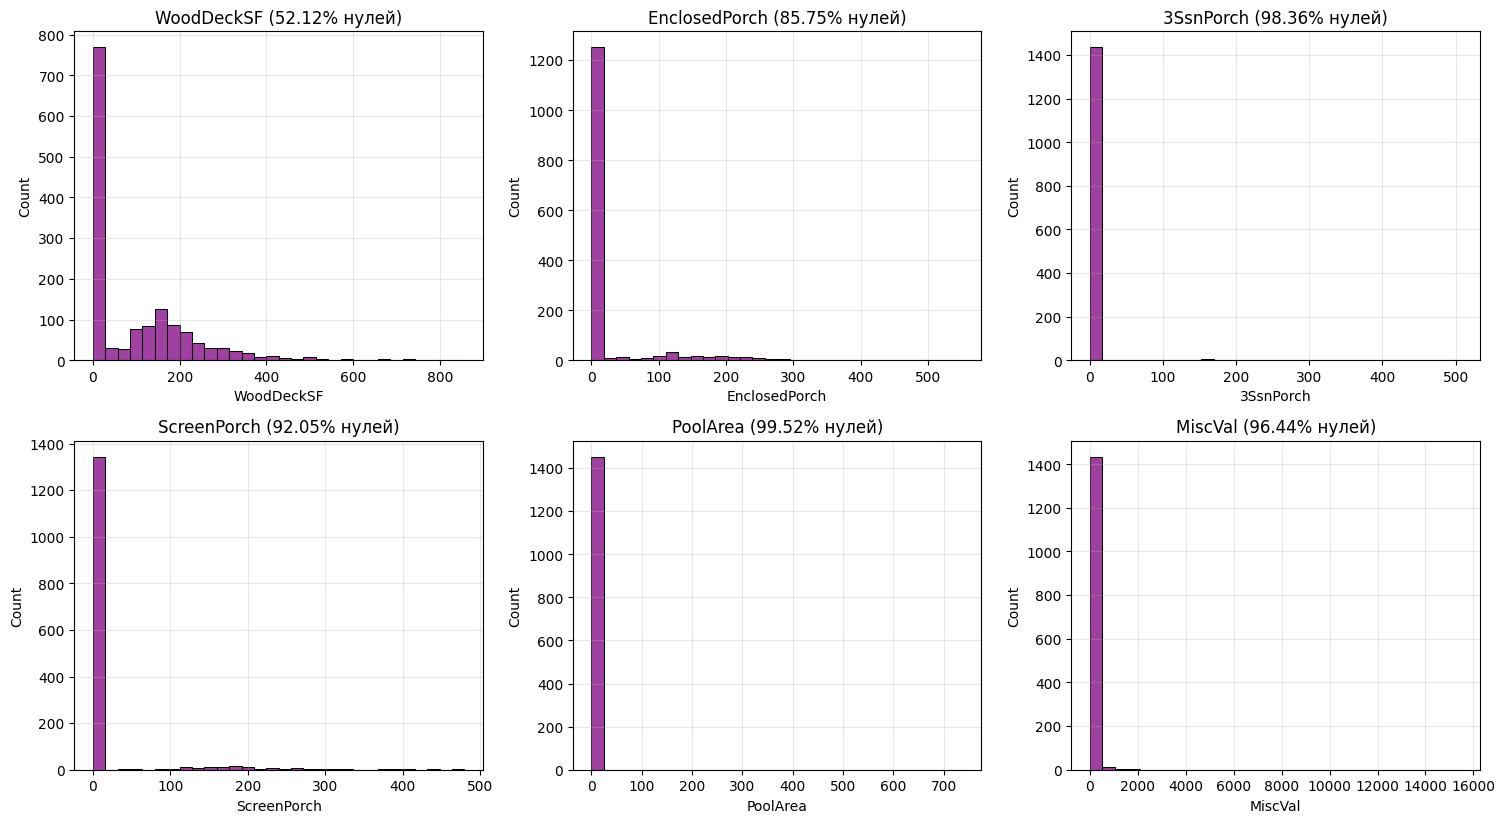

In [1332]:
def viz_zeros(columns_slice):
    sparse_cols = [c for c in columns_slice if (data_train[c] == 0).mean() > 0.5]
    
    rows = (len(sparse_cols) // 3) + 1
    plt.figure(figsize=(15, 4 * rows))
    
    for i, col in enumerate(sparse_cols):
        plt.subplot(rows, 3, i + 1)
        sns.histplot(data_train[col], bins=30, kde=False, color='purple')
        plt.title(f'{col} ({(data_train[col] == 0).mean():.2%} нулей)')
        plt.grid(alpha=0.3)
        
    plt.tight_layout()
    plt.show()

print("--- ГРУППА 1 (Первые 20) ---")
viz_zeros(continuous_columns[:20])

print("\n--- ГРУППА 2 (Остальные) ---")
viz_zeros(continuous_columns[20:])

In [1333]:
data_train['HasScreenPorch'] = data_train['ScreenPorch'].apply(lambda x: 1 if x > 0 else 0)
data_train.drop(columns=['PoolArea', 'MiscVal', 'ScreenPorch', '3SsnPorch', 'LowQualFinSF'], inplace=True)
continuous_columns.remove('PoolArea')
continuous_columns.remove('MiscVal')
continuous_columns.remove('ScreenPorch')
continuous_columns.remove('3SsnPorch')
continuous_columns.remove('LowQualFinSF')
continuous_columns.append('HasScreenPorch')
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasScreenPorch
0,60,RL,65.0,8450,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,...,0,61,0,No Fence,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,No Alley,Reg,Lvl,FR2,Gtl,Veenker,...,298,0,0,No Fence,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,...,0,42,0,No Fence,9,2008,WD,Normal,223500,0
3,70,RL,60.0,9550,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,...,0,35,272,No Fence,2,2006,WD,Abnorml,140000,0
4,60,RL,84.0,14260,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,...,192,84,0,No Fence,12,2008,WD,Normal,250000,0


In [ ]:
data_train['']

In [1334]:
data_train['RemodAge'] = data_train['YrSold'] - data_train['YearRemodAdd']
data_train['EstateAge'] = data_train['YrSold'] - data_train['YearBuilt']

In [1335]:
data_train.drop(columns=['YearBuilt', 'YearRemodAdd', 'YrSold'], inplace=True)
continuous_columns.append('RemodAge')
continuous_columns.append('EstateAge')
continuous_columns.remove('YearBuilt')
continuous_columns.remove('YearRemodAdd')
continuous_columns.remove('YrSold')

Text(0.5, 1.0, 'Correlation Matrix')

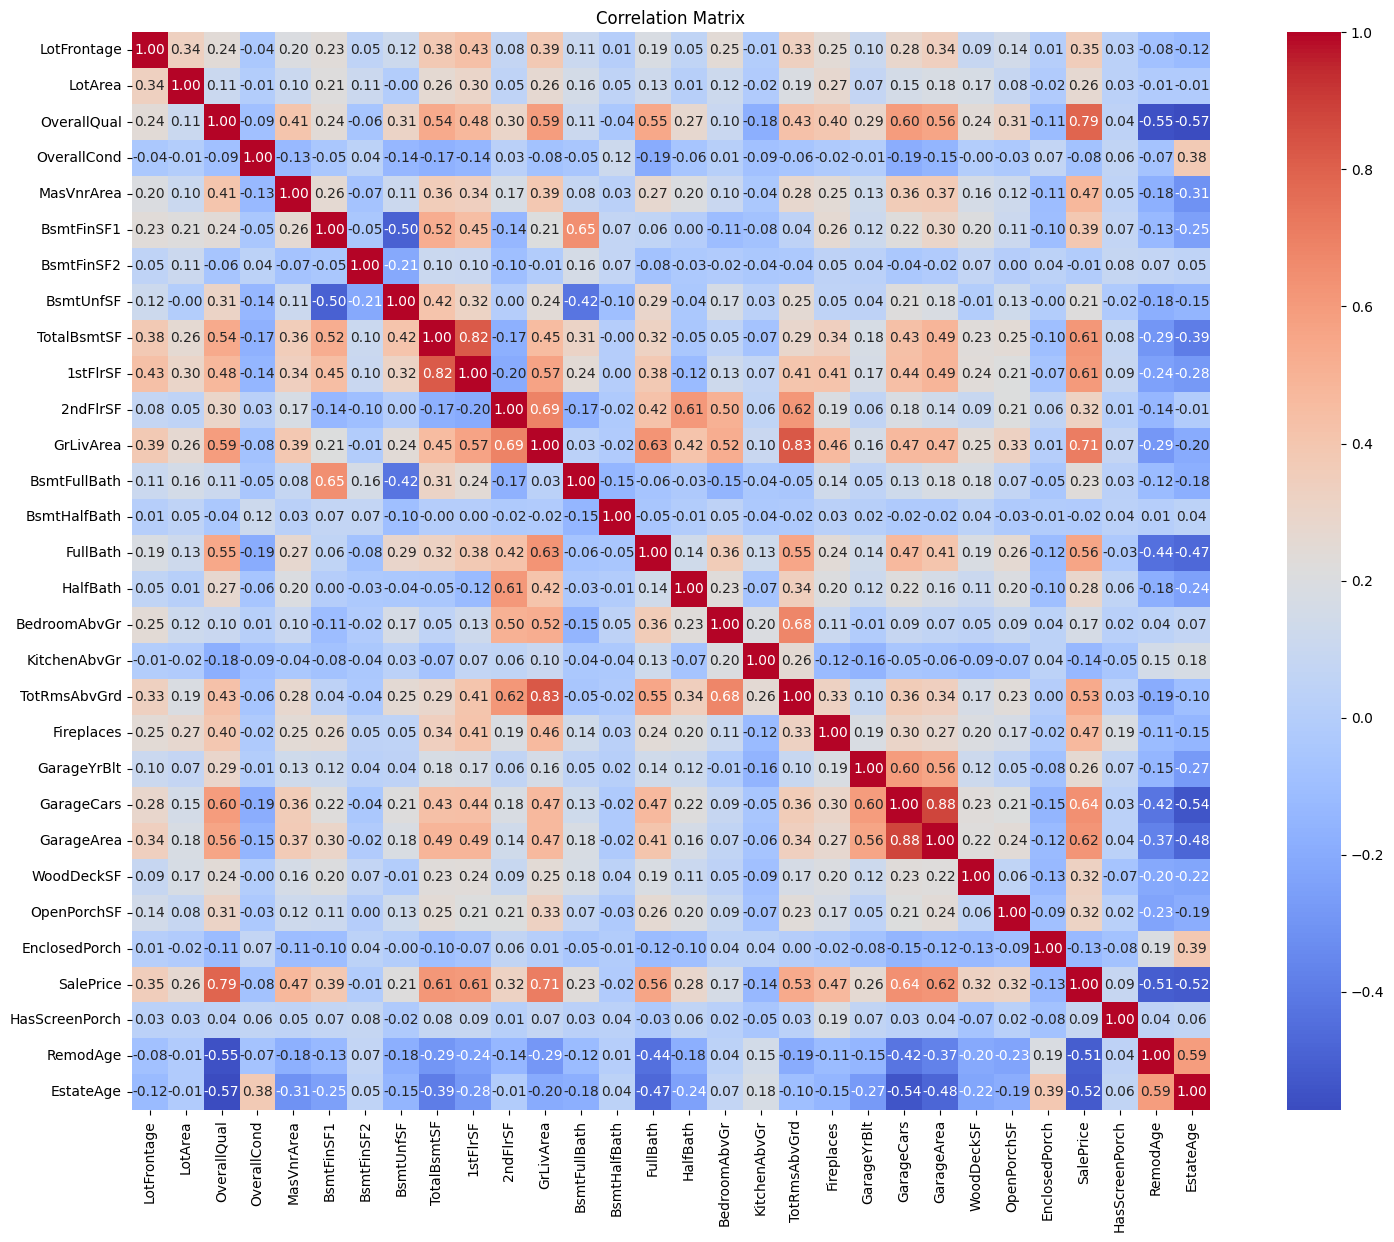

In [1336]:
corr = data_train[continuous_columns].corr()
plt.figure(figsize=(20,14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

## Model with continuous features only

### Overall quality of a real estate

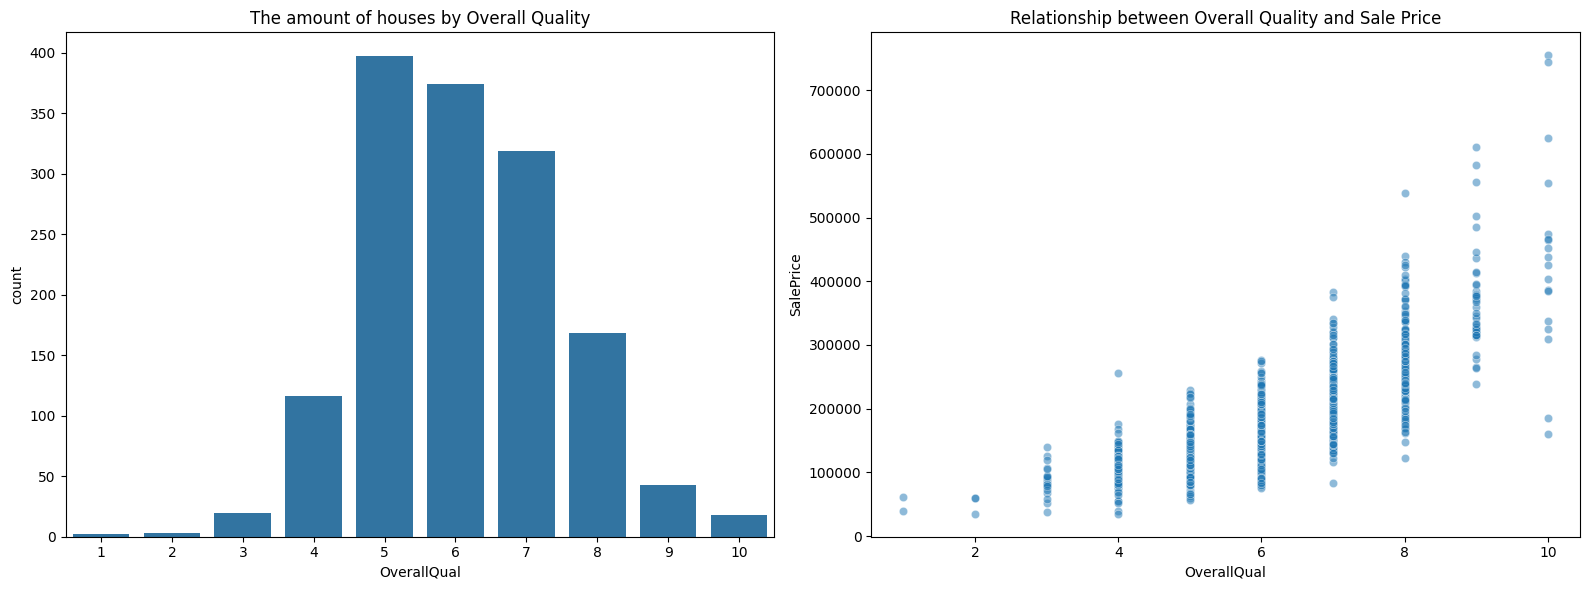

In [1345]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='OverallQual', data=data_train, ax=ax[0])
ax[0].set_title('The amount of houses by Overall Quality')

sns.scatterplot(x='OverallQual', y='SalePrice', data=data_train, ax=ax[1], alpha=0.5)
ax[1].set_title('Relationship between Overall Quality and Sale Price')

plt.tight_layout()
plt.show()

### Ground Live Area

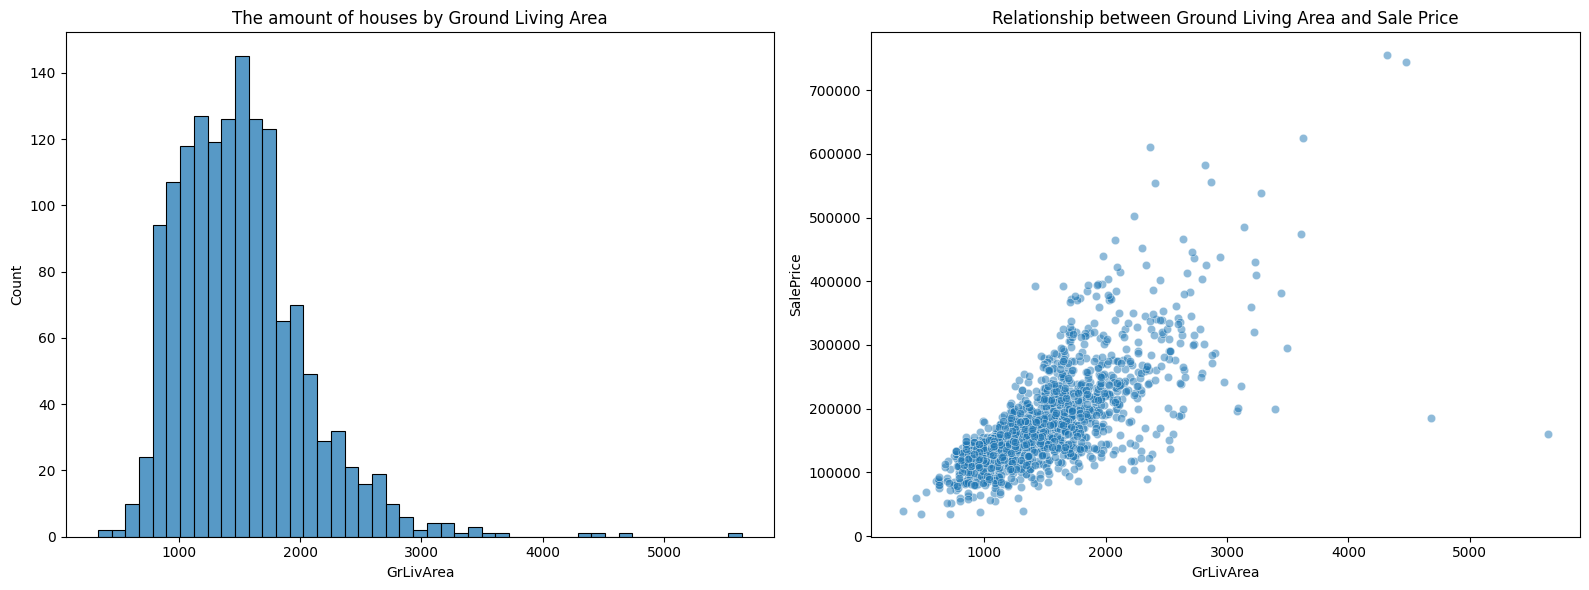

In [1347]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(x='GrLivArea', data=data_train, ax=ax[0])
ax[0].set_title('The amount of houses by Ground Living Area')

sns.scatterplot(x='GrLivArea', y='SalePrice', data=data_train, ax=ax[1], alpha=0.5)
ax[1].set_title('Relationship between Ground Living Area and Sale Price')
plt.tight_layout()
plt.show()

In [1349]:
data_train = data_train[data_train['GrLivArea'] < 4000]

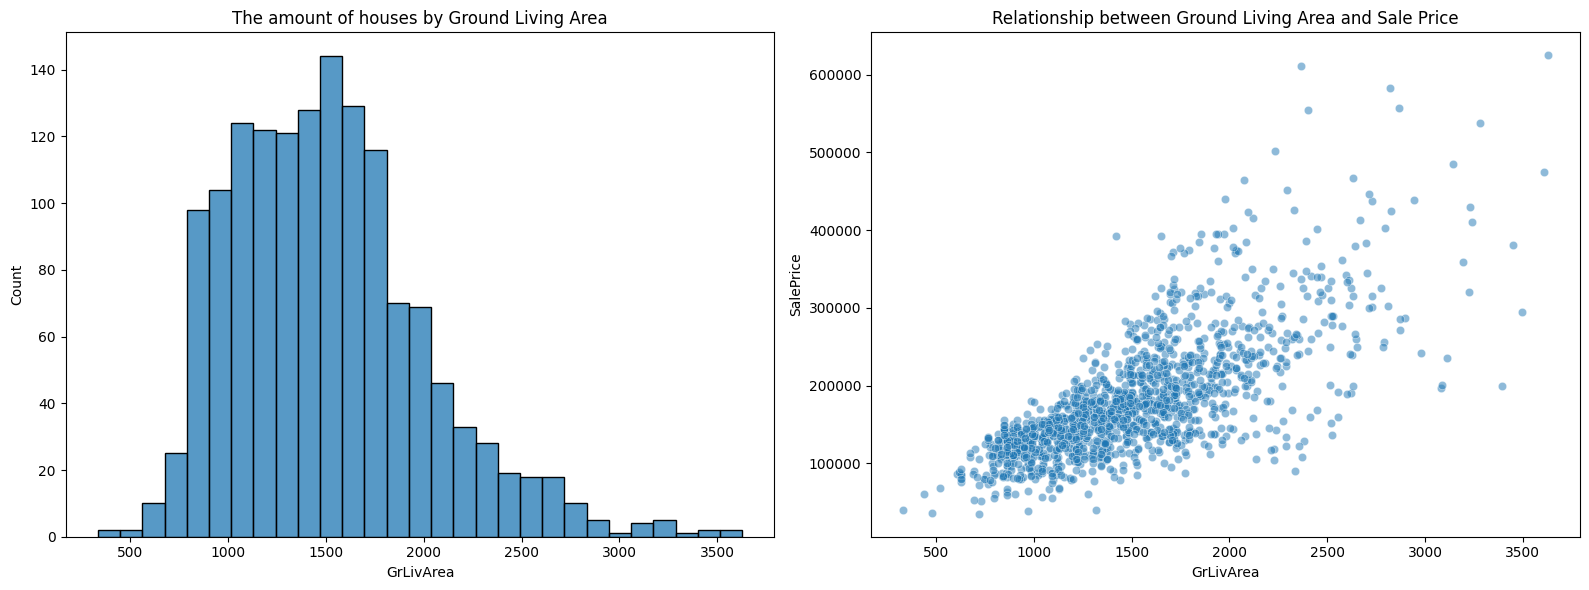

In [1350]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(x='GrLivArea', data=data_train, ax=ax[0])
ax[0].set_title('The amount of houses by Ground Living Area')

sns.scatterplot(x='GrLivArea', y='SalePrice', data=data_train, ax=ax[1], alpha=0.5)
ax[1].set_title('Relationship between Ground Living Area and Sale Price')
plt.tight_layout()
plt.show()

## Feature engineering

In [1337]:
# y = data_train['SalePrice']
# X = data_train.drop(columns=['SalePrice'], inplace=True)

In [1338]:
# plt.figure(figsize=(10,6))
# sns.histplot(y, kde=True)
# plt.title('Distribution of SalePrice')
# plt.show()

In [1339]:
# y.describe()

In [1340]:
# pd.DataFrame(y).skew()

The distribution is skewed to the right, mean is greater than median (50%). The skewness coefficient is almost 2.